In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
print(np.__version__)


2.20.0
2.0.2


In [4]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

In [5]:
classes=[]
filename='brain-tumor-mri-dataset'
for sub_folder in os.listdir(os.path.join(filename,'Training')):
    classes.append(sub_folder)
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [6]:
train_path='brain-tumor-mri-dataset/Training/'
test_path='brain-tumor-mri-dataset/Testing/'

In [7]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(train_path+label):
        img_list.append(train_path+label+'/'+img_file)
        label_list.append(label)

In [8]:
train_data = pd.DataFrame({'Image':img_list,'Label':label_list})
train_data

,Image,Label
0,brain-tumor-mri-dataset/Training/glioma/gl-000...,glioma
1,brain-tumor-mri-dataset/Training/glioma/gl-000...,glioma
2,brain-tumor-mri-dataset/Training/glioma/gl-000...,glioma
3,brain-tumor-mri-dataset/Training/glioma/gl-000...,glioma
4,brain-tumor-mri-dataset/Training/glioma/gl-000...,glioma
...,...,...
11556,brain-tumor-mri-dataset/Training/pituitary/Tr-...,pituitary
11557,brain-tumor-mri-dataset/Training/pituitary/Tr-...,pituitary
11558,brain-tumor-mri-dataset/Training/pituitary/Tr-...,pituitary
11559,brain-tumor-mri-dataset/Training/pituitary/Tr-...,pituitary


In [9]:
img_list=[]
label_list=[]
for label in classes:
    for img_file in os.listdir(test_path+label):
        img_list.append(test_path+label+'/'+img_file)
        label_list.append(label)

In [10]:
test_data = pd.DataFrame({'Image':img_list,'Label':label_list})
test_data

,Image,Label
0,brain-tumor-mri-dataset/Testing/glioma/gl-1321...,glioma
1,brain-tumor-mri-dataset/Testing/glioma/gl-1322...,glioma
2,brain-tumor-mri-dataset/Testing/glioma/gl-1323...,glioma
3,brain-tumor-mri-dataset/Testing/glioma/gl-1324...,glioma
4,brain-tumor-mri-dataset/Testing/glioma/gl-1325...,glioma
...,...,...
2610,brain-tumor-mri-dataset/Testing/pituitary/Te-p...,pituitary
2611,brain-tumor-mri-dataset/Testing/pituitary/Te-p...,pituitary
2612,brain-tumor-mri-dataset/Testing/pituitary/Te-p...,pituitary
2613,brain-tumor-mri-dataset/Testing/pituitary/Te-p...,pituitary


In [42]:
def Plot_Classes(BASE_URL, Rows=2, Columns=5):


  plt.figure(figsize = (25, 8))

  image_count = 1

  for directory in os.listdir(BASE_URL):

      if directory[0] != '.':

          Max_Random = len(os.listdir(os.path.join(BASE_URL,directory)))

          Random_Number = np.random.randint(0, Max_Random)

          for i, file in enumerate(os.listdir(BASE_URL + directory)):

              if i == Random_Number:

                  fig = plt.subplot(Rows, Columns, image_count)
                  image_count += 1

                  image = plt.imread(BASE_URL + directory + '/' + file)
                  plt.imshow(image, cmap='gray')

                  plt.title(directory)

                  break

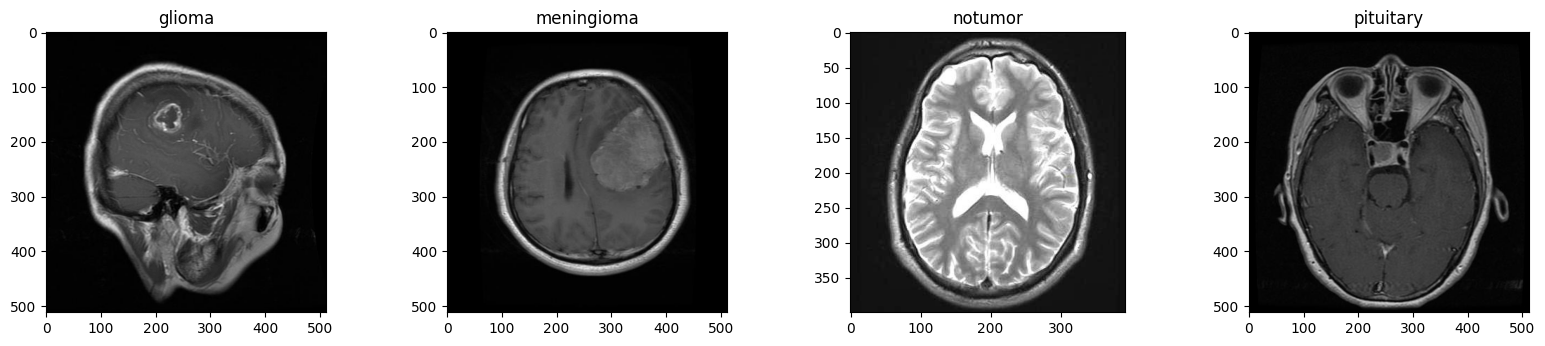

In [43]:
Plot_Classes(train_path)


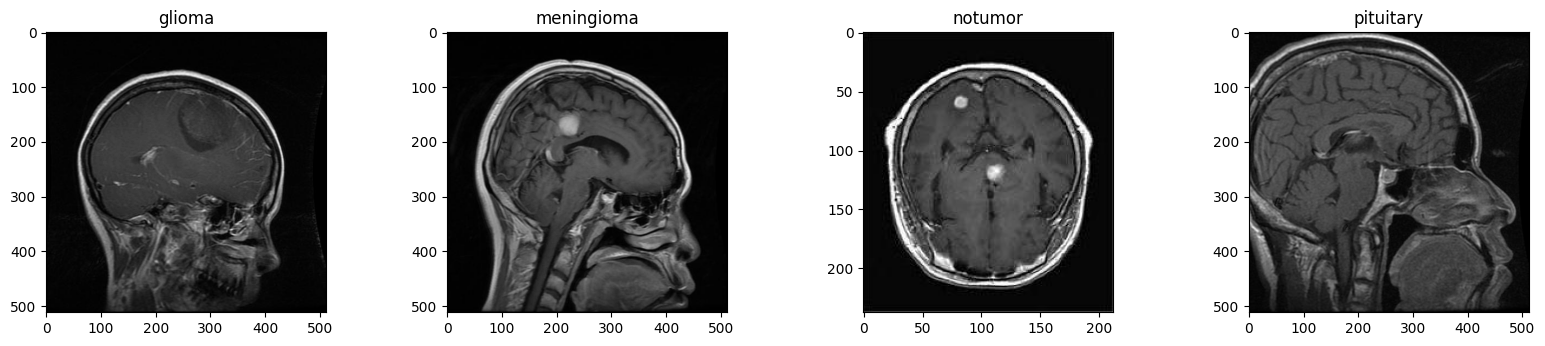

In [44]:
Plot_Classes(test_path)

In [14]:
train_data['Label'].value_counts()


Label
notumor       3194
pituitary     2913
meningioma    2813
glioma        2641
Name: count, dtype: int64

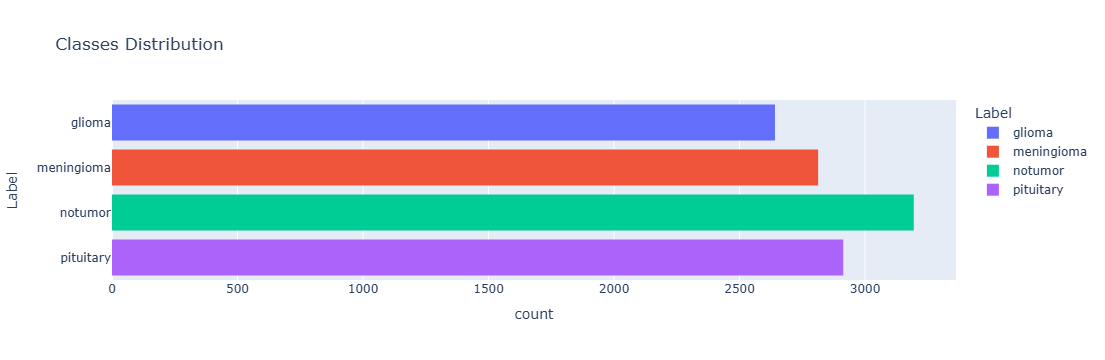

In [15]:
px.histogram(train_data, y="Label", color="Label", title="Classes Distribution")

In [16]:
test_data['Label'].value_counts()

Label
notumor       806
meningioma    607
glioma        601
pituitary     601
Name: count, dtype: int64

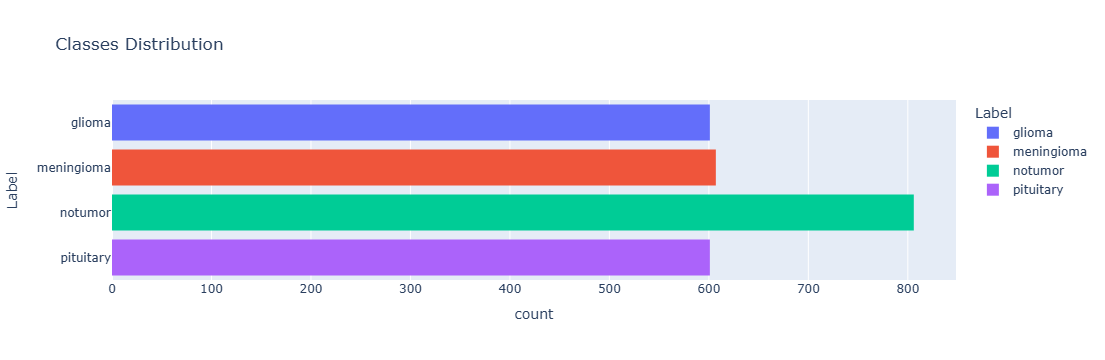

In [17]:
px.histogram(test_data, y="Label", color="Label", title="Classes Distribution")

In [18]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32

In [19]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.15)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

# Creating training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training',  
                                                    seed=0)

# Creating validation data generator
val_generator = val_datagen.flow_from_directory(train_path,
                                                target_size=image_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation', 
                                                seed=0)

# No augmentation of the test data, just rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# applying the generator to testing data with constant seed
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=False,
                                                  seed=0)

Found 9829 images belonging to 4 classes.
Found 1732 images belonging to 4 classes.
Found 2615 images belonging to 4 classes.


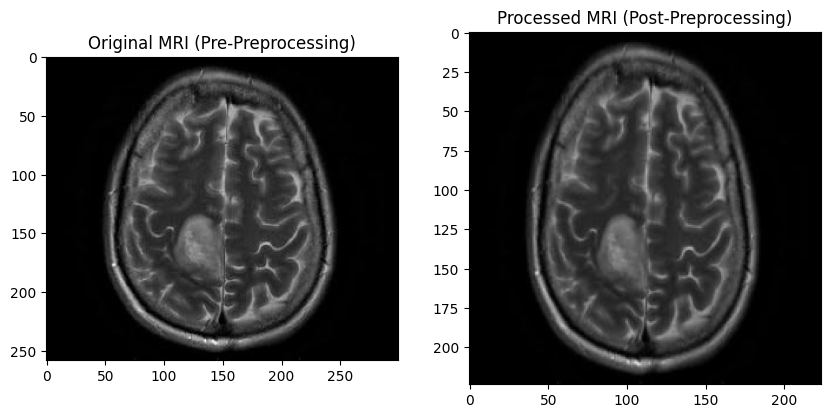

In [20]:
import cv2
# Load a sample MRI image (replace with your path)
original_img = cv2.imread("brain-tumor-mri-dataset\Training\meningioma\Tr-me_0188.jpg", cv2.IMREAD_GRAYSCALE)  # Reads as grayscale

# Preprocessing steps
resized_img = cv2.resize(original_img, (224, 224))  # Resize
normalized_img = resized_img / 255.0  # Normalize
rgb_img = np.stack([normalized_img]*3, axis=-1)  # Convert to 3-channel

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original MRI (Pre-Preprocessing)")
plt.imshow(original_img, cmap="gray")
plt.axis("on")

plt.subplot(1, 2, 2)
plt.title("Processed MRI (Post-Preprocessing)")
plt.imshow(rgb_img)  # VGG16-ready RGB format
plt.axis("on")
plt.show()

In [21]:
def show_ImageDataGenerator(ImageDataGenerator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to viusalize how the ImageDataGenerator augments the data
    """

    # Generate augmented samples
    # Use __next__() instead of next()
    augmented_samples = train_generator.__next__()

    # Extract images from the batch
    images = augmented_samples[0][:num_samples]

    # Display the augmented images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()

    if save:
        plt.savefig('show_ImageDataGenerator.pdf')

    plt.show()

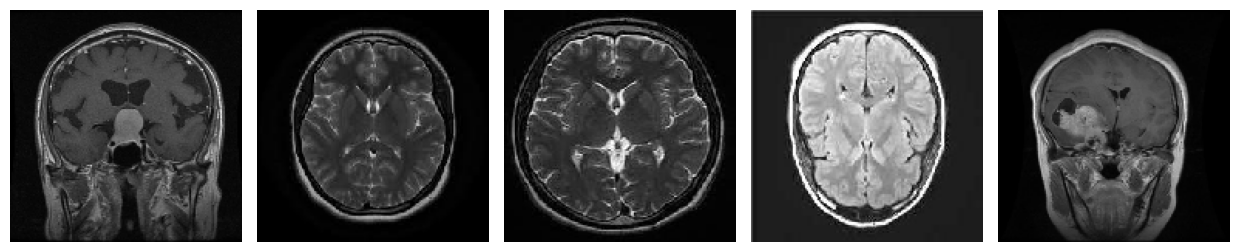

In [22]:
show_ImageDataGenerator(train_datagen, num_samples=5, figsize=(12.5, 8), save=False)

In [23]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)


print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (150, 150, 3)
Batch size: 32
Number of Train batches: 308
Number of Validation batches: 55
Number of Testing batches: 82


In [24]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [25]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(1, len(loss) + 1)

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [26]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

In [39]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


for layer in base_model_vgg.layers[:-10]:
    layer.trainable = False

for layer in base_model_vgg.layers[-10:]:
    layer.trainable = True

# Add custom classification head
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)  

model_vgg = Model(inputs=base_model_vgg.input, outputs=output)

model_vgg.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_vgg.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,6

 Total params: 14,979,396 (57.14 MB)

 Trainable params: 13,833,988 (52.77 MB)

 Non-trainable params: 1,145,408 (4.37 MB)

In [41]:
vgg_history = model_vgg.fit(train_generator,epochs=2,validation_data=val_generator)

Epoch 1/2
 14/308 ━━━━━━━━━━━━━━━━━━━━ 19:35 4s/step - accuracy: 1.0000 - loss: 1.9951e-05

KeyboardInterrupt: 

In [26]:

plot_curves(vgg_history)

NameError: name 'vgg_history' is not defined

In [35]:
loss, accuracy = model_vgg.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 635ms/step - accuracy: 0.9640 - loss: 0.1177
Test Loss: 0.08255
Test Accuracy: 0.97407


41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 609ms/step
Classification Report for <Functional name=functional, built=True>:
              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       300
  meningioma       0.98      0.93      0.95       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.94      1.00      0.97       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



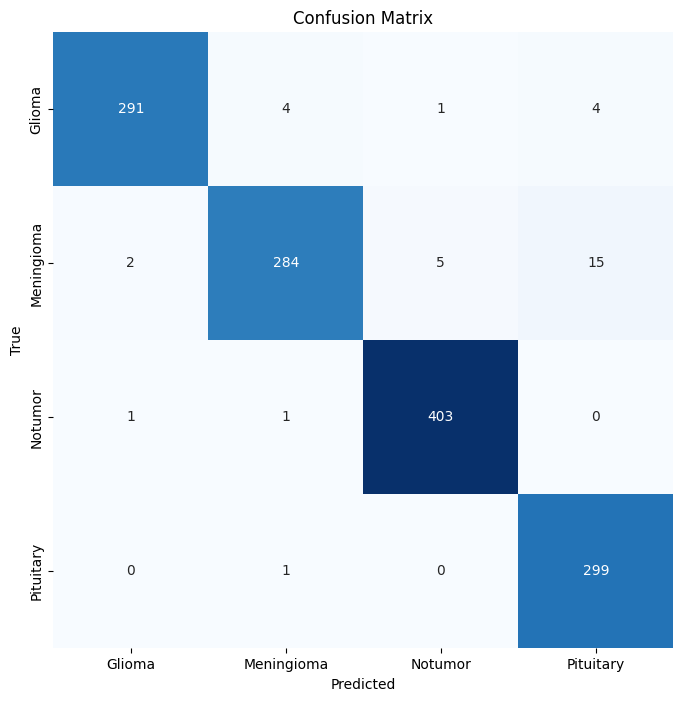

In [38]:
# Plotting confusion matrix
confusion_matrix = CM(model=model_vgg, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()

In [32]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


base_model_resnet = ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


for layer in base_model_resnet.layers[:-20]:
     layer.trainable = False

#for layer in base_model_resnet.layers[-20:]:
#     layer.trainable = True
    

# Add custom classification head
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)  

model_resnet = Model(inputs=base_model_resnet.input, outputs=output)

model_resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 156, 156, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 75, 75, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 75, 75, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 75, 75, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 77, 77, 64)        │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 38, 38, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 38, 38, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 38, 38, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 38, 38, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 38, 38, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 38, 38, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 38, 38, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 43,709,316 (166.74 MB)

 Trainable params: 9,982,468 (38.08 MB)

 Non-trainable params: 33,726,848 (128.66 MB)

In [33]:
resnet_history = model_resnet.fit(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 818s 3s/step - accuracy: 0.7308 - loss: 0.6659 - val_accuracy: 0.6669 - val_loss: 0.9509
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 755s 2s/step - accuracy: 0.8509 - loss: 0.3742 - val_accuracy: 0.8135 - val_loss: 0.4937
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.8863 - loss: 0.2991 - val_accuracy: 0.8920 - val_loss: 0.3058
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 300s 975ms/step - accuracy: 0.9019 - loss: 0.2523 - val_accuracy: 0.9094 - val_loss: 0.2564
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 299s 970ms/step - accuracy: 0.9204 - loss: 0.2092 - val_accuracy: 0.8464 - val_loss: 0.5083
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 297s 963ms/step - accuracy: 0.9279 - loss: 0.1899 - val_accuracy: 0.8089 - val_loss: 0.8128
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 295s 958ms/step - accuracy: 0.9359 - loss: 0.1724 - val_accuracy: 0.8868 - val_loss: 0.3238
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 290s 940ms/step - accuracy: 0.9434 - loss: 0.

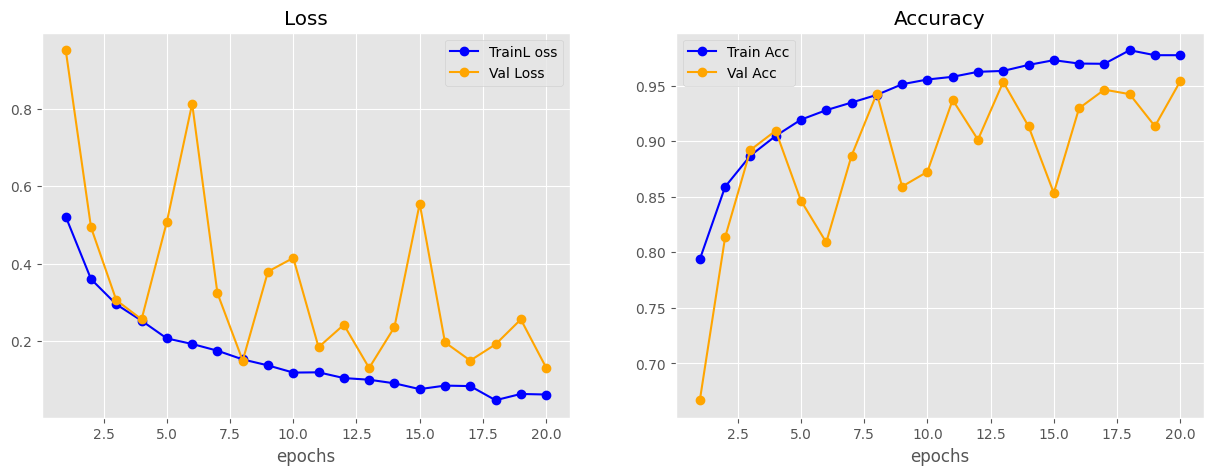

In [36]:
plot_curves(resnet_history)

In [37]:
loss, accuracy = model_resnet.evaluate(test_generator)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")

82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 704ms/step - accuracy: 0.8773 - loss: 0.3644
Test Loss: 0.21205
Test Accuracy: 0.92811


82/82 ━━━━━━━━━━━━━━━━━━━━ 60s 702ms/step
Classification Report for <Functional name=functional_2, built=True>:
              precision    recall  f1-score   support

      glioma       0.95      0.82      0.88       601
  meningioma       0.81      0.93      0.87       607
     notumor       0.99      0.98      0.99       806
   pituitary       0.96      0.96      0.96       601

    accuracy                           0.93      2615
   macro avg       0.93      0.92      0.92      2615
weighted avg       0.93      0.93      0.93      2615



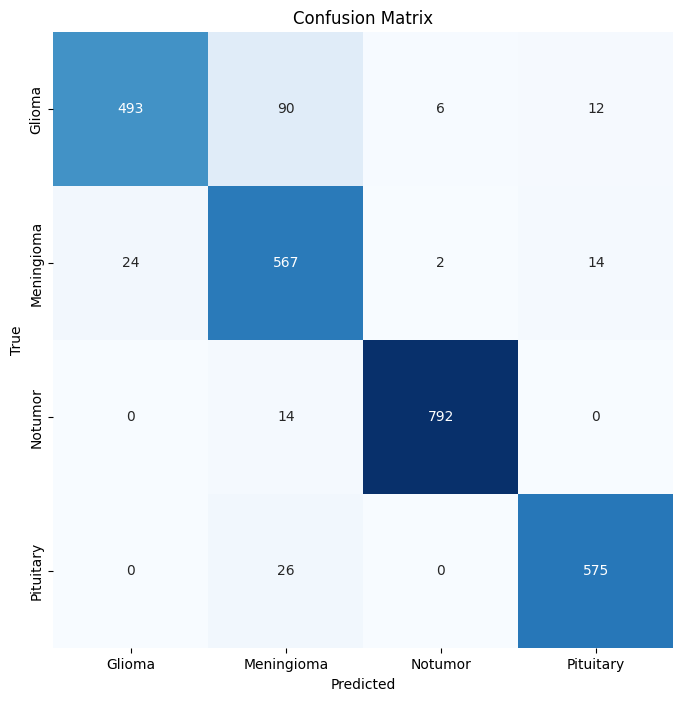

In [38]:
# Plotting confusion matrix
confusion_matrix = CM(model=model_resnet, test_generator=test_generator, categories=classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) + 0.5,
           labels=[name.title() for name in classes], va='center')
plt.show()


In [3]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())


2.20.0
[]
False


In [29]:
!python --version

Python 3.9.20


In [35]:
model_resnet.save("resnet101_brain_tumor.keras")


In [ ]:
model_vgg.save("vgg16_brain_tumor.keras")